In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib

plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

데이터 시각화는 데이터 분석에서 가장 중요한 작업 중 하나이다.
결측값 혹은 이상값(outliers)을 식별하거나, 데이터 변환(transformation)의 필요성을 파악하거나, 어떤 모델을 적용할 지에 대한 아이디어를 얻는데 도움이 될 수 있다. 파이썬에는 데이터 시각화를 위한 많은 라이브러리가 있지만 여기서는 `matplotlib`에 집중한다.
`matplotlib`는 2002년에 John Hunter에 의해
Python에서 MATLAB과 유사한 플로팅(plotting) 인터페이스를 구현하기 위해 시작되었다.

##  **matplotlib API 개요**

### Figures와 Subplots (혹은 axes)

matplotlib의 API는 다소 혼란스러운 면이 있다. 동일한 작업을 하는 여러 가지 방법을 제공하기 때문이며, 또한 실행 환경(backend)에 따라(예를 들어 스크립트 파일이냐 노트북 파일이냐에 따라서) 약간의 차이가 있기 때문이다.

**객체(object)**

Matplotlib은 객체 지향적(object-oriented)이며 주요 객체는 `figure`와 `axes`이다.
`figure`는 캔버스(canvas)라고 생각하면 되는데, 일반적으로 배경색 등을 지정할 수 있다. 캔버스인 `figure`에 하나 혹은 그 이상의 `axes` 객체와 텍스트 레이블 등을 배치한다. 즉, `axes`를 실제 플롯(plot)이라고 생각하면 된다.

`axes`은 스위스 군용 나이프처럼 생각할 수 있으며, 다양한 차트 종류(예: `.plot`, `.scatter`, `.hist` 등)를 제공하는 편리한 객체이며, 아래 그림에서 실제로 그래프가 그려지는 영역이라고 생각하면 된다.

> <img src="https://raw.github.com/ohheum/DS2022/6b5176fd3da54f852bb66132c5c6c11f0cee4867/assets/figures-1.png" width="300" height="300">

**plt 절차적 인터페이스**

Matplotlib가 객체지향 프로그래밍에 익숙한 사용자를 혼란스럽게 만드는 것은 많은 경우 명시적으로 `figure` 객체와 `axes` 객체를 생성/참조하지 않고도 `plt`인터페이스를 통해서 플롯팅을 할 수 있다는 점에서 기인한다. 그런 경우 숨겨진(hidden) 기본(default) `figure`와 `axes` 객체가 있다고 생각하면 된다.

`plt` 인터페이스는 원래 MATLAB™ 인터페이스를 모방하기 위해 개발되었지만 객체 지향 인터페이스와 크게 다르지 않다. 주요 객체(예: `figure`와 `axes`)를 직접 참조하지 않더라도 이러한 객체는 자동으로 인스턴스화되며 각 `plt` 메서드는 기본적으로 기본 객체의 메서드 중 하나에 대한 호출로 변환된다. 예들 들어 `plt.plot()`은 `hidden_axes.plot()`이고 `plt.savefig()`는 `hidden_figure.savefig()`이다.

### 플롯을 생성하는 4가지 방법

**첫 번째 방법:** 오직 하나의 `axes`만이 필요하다면 다음과 같이 `plt` 인터페이스만을 사용하여 숨겨진 `figure` 객체의 숨겨진 `axes` 객체에 그리는 것이 가장 간단하다.

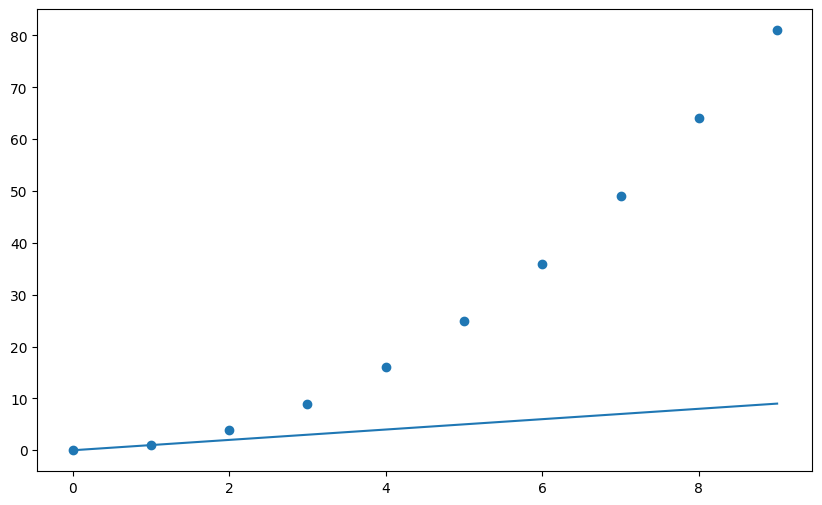

In [ ]:
data = np.arange(10) # data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(data)
plt.scatter(data, data**2)
# plt.show()                # notebook 환경에서는 불필요
# print(plt.get_fignums())  # open되어 있는 모든 figure들은 고유한 번호를 가진다.
                            # notebook 환경에서는 셀을 벗어나면 figure는 자동으로 close된다.
# print(plt.gcf())          # get current figure

위의 코드에 의해서 눈에 보이지 않는 하나의 `figure`객체와 `axes`객체가 생성되고, 그 `axes`에 차트가 그려진다. 노트북에서는 셀이 종료되면 이 `figure` 객체는 자동으로 `close()`된다. 노트북 환경에서는 `plt.show()`를 호출할 필요는 없다.

**두 번째 방법:** 역시 오직 하나의 플롯이 필요한 경우 `plt` 인터페이스를 사용하여 `axes` 객체에 대한 핸들(handle)을 확보한다. `figure` 객체는 여전히 숨겨진 객체로 남아있다.

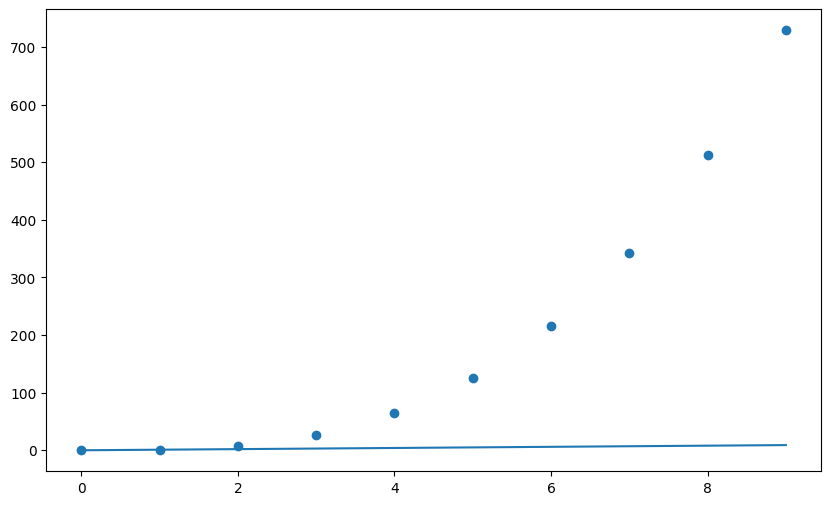

In [ ]:
ax = plt.subplot()
ax.plot(data)
# ax.hist(data)
ax.scatter(data, data**3)

**세 번째 방법:** 명시적으로 `figure`와 `axes` 객체에 대한 핸들을 확보하는 것이다.다음과 같이 `plt.figure()` 명령으로 새 `figure` 객체를 만들고 `subplot`들을 추가한다. 하나의 `figure`에 여러 개의 플롯을 포함할 때 사용한다.

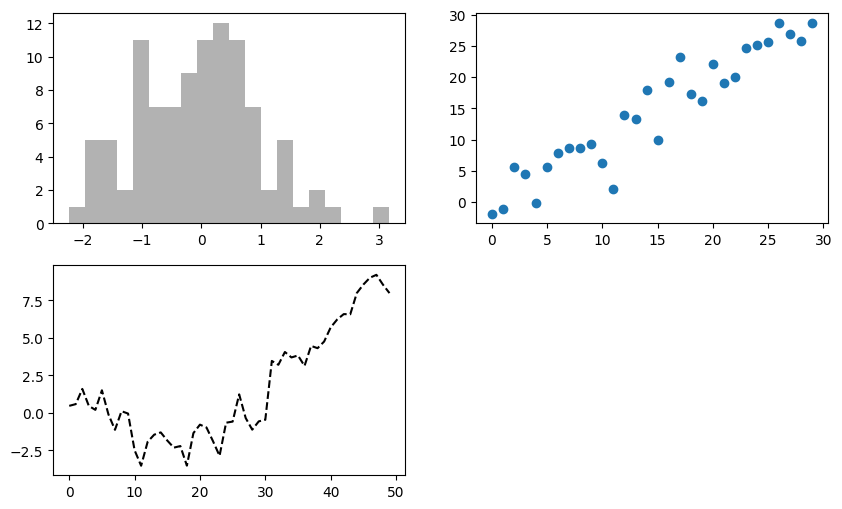

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)      # 2 × 2 플롯이며 그중 첫 번째 플롯이다.
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

**네 번째 방법**: 하위 플롯의 그리드를 더 편리하게 만들 수 있도록, matplotlib는 `plt.subplots`
메서드를 제공한다. 이 메서드는 새로운 `figure` 객체를 생성하고 지정된 개수의
`axes `객체를 포함하는 NumPy 배열을 반환한다.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

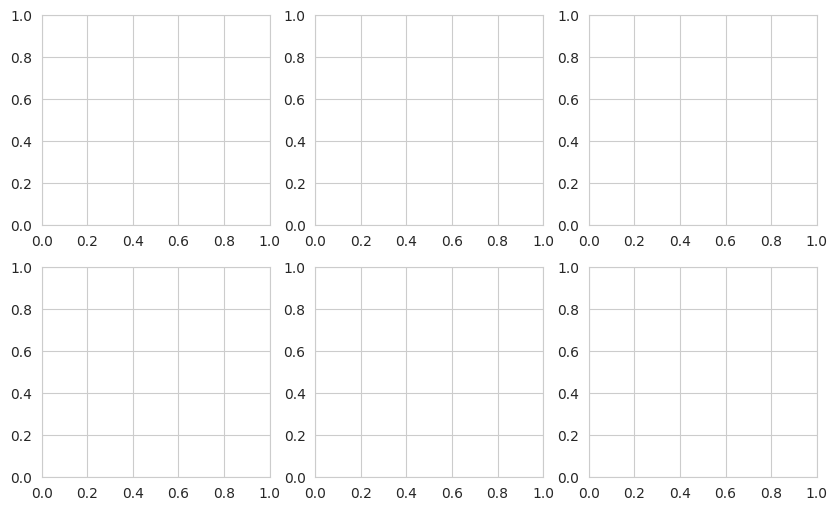

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

배열 `axes`는 2차원 배열처럼 인덱싱할 수 있다.
또한 `sharex`와 `sharey` 옵션을 사용하여 하위 플롯들이 동일한 `x`축 또는 `y`축을 갖도록 지정할 수도 있다.

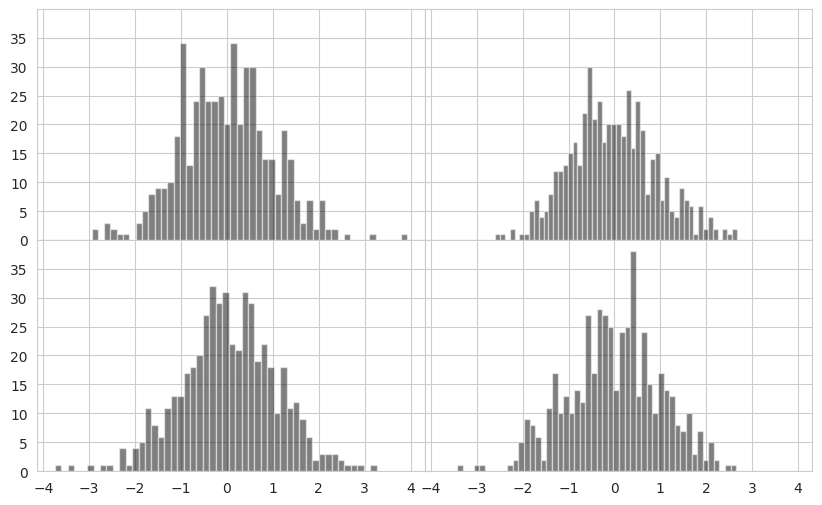

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

위에서 4가지 방법으로 그린 차트들을 모두 하나의 셀에서 그려보자. 세번째와 네번째 방법은 새로운 `fugure`객체를 생성하지만 두 번째 방법은 숨겨진 기본 `fugure` 객체에 플롯을 추가한다는 것을 알 수 있다. 이 상황이 파이썬 스크립트에서 일어나는 상황이라고 생각하면 된다.

[1, 2, 3]


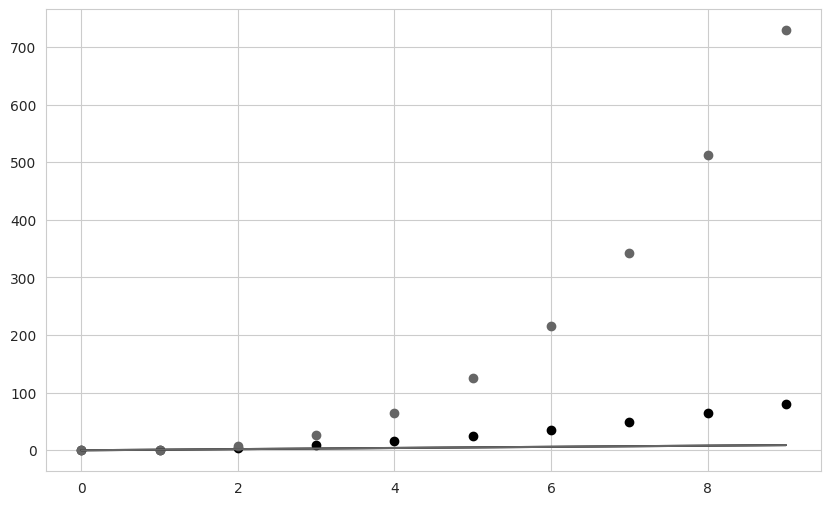

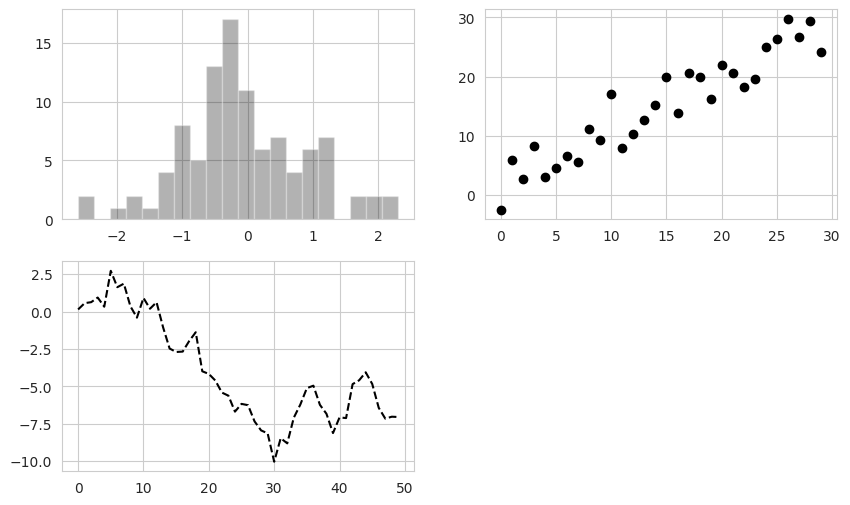

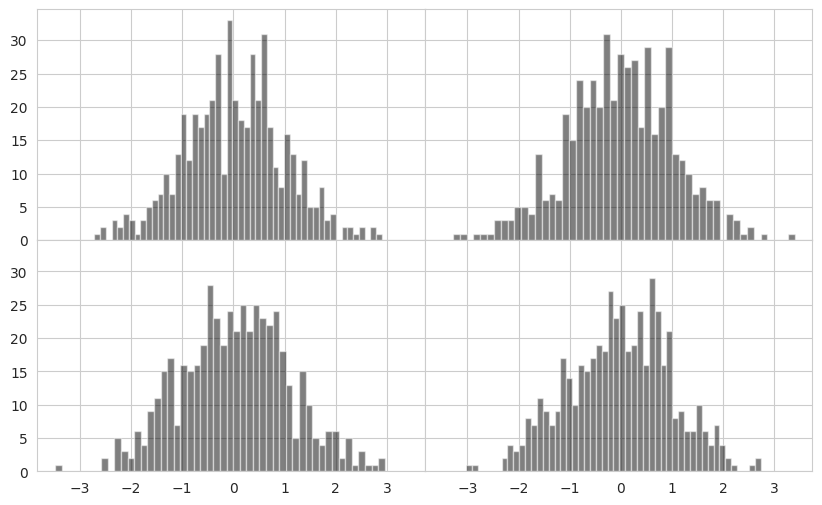

In [ ]:
# 첫 번째 방법
data = np.arange(10) # data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(data)
plt.scatter(data, data**2)
# plt.show()
# plt.close('all')

# 두 번째 방법
ax = plt.subplot()
ax.plot(data)
# ax.hist(data)
ax.scatter(data, data**3)

# 세 번째 방법
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)      # 2 × 2 플롯이며 그중 첫 번째 플롯이다.
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

# 네 번째 방법
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

# 3개의 figure 객체가 존재한다는 것을 알 수 있다.
print(plt.get_fignums())

### 색상(color), 마커(marker),  그리고 라인 스타일(line style)

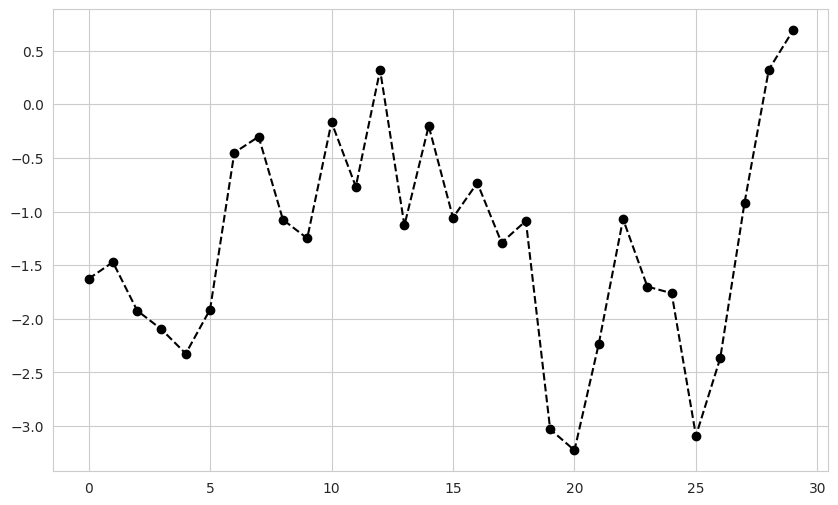

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

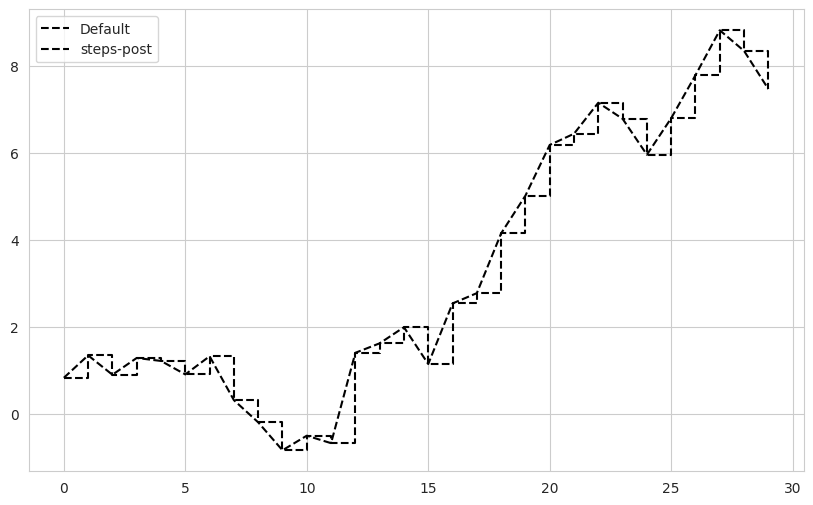

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

### Ticks, Labels, and Legends

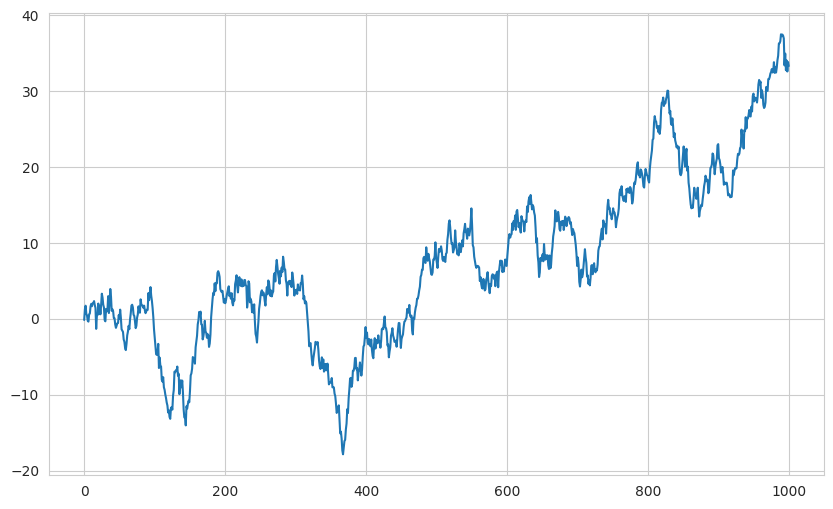

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

Text(0.5, 1.0, 'My first matplotlib plot')

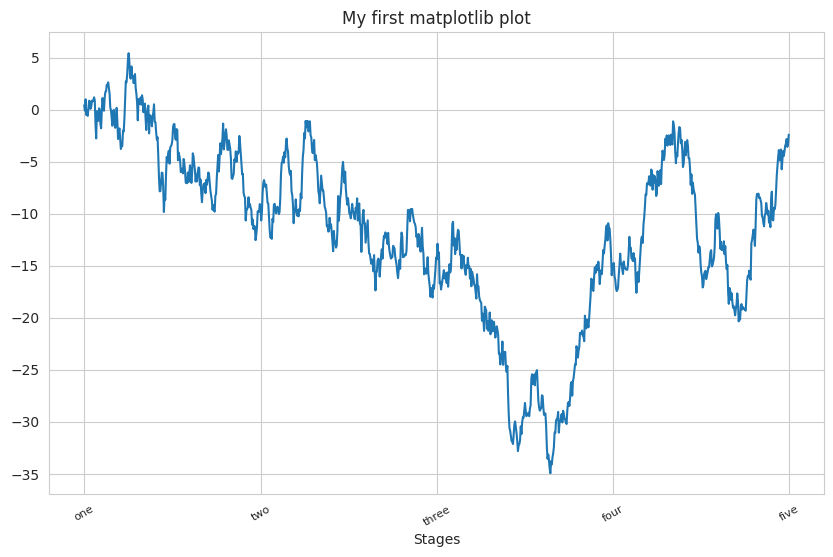

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

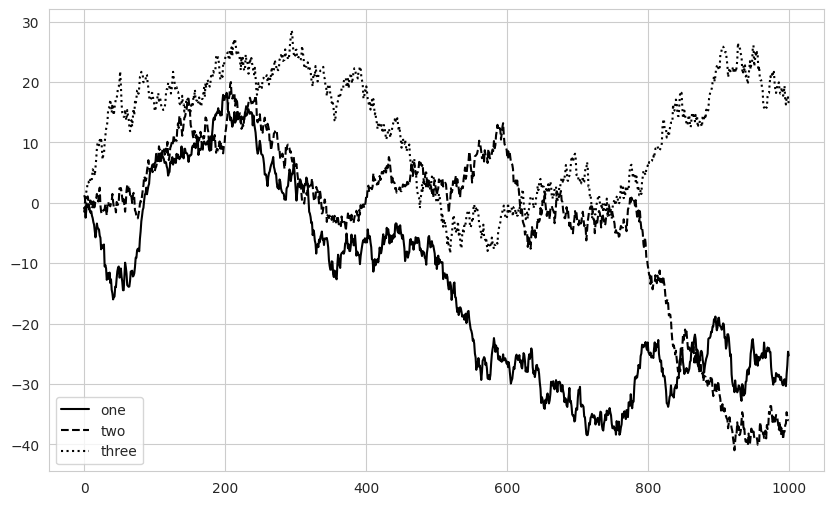

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");
ax.legend()

### Annotations and Drawing on a Subplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from datetime import datetime
data = pd.read_csv("/content/drive/MyDrive/DataScience2023/chap05_visualization/datasets/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx

Date
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

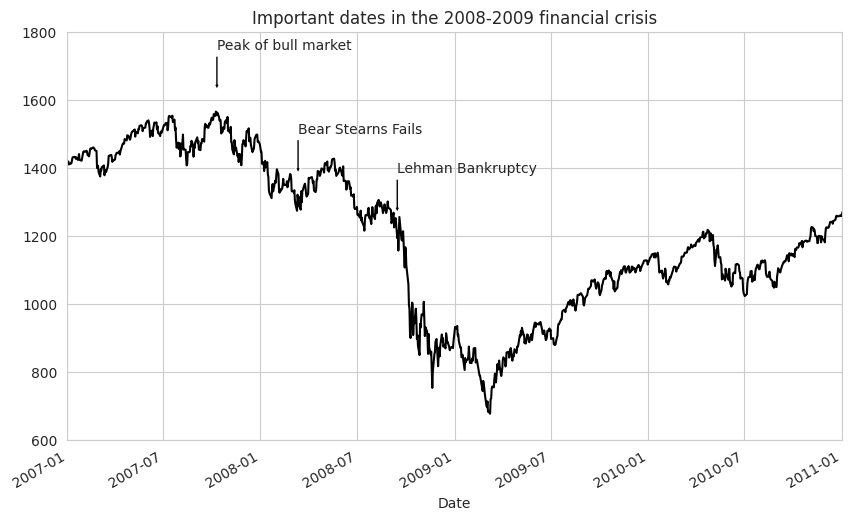

In [ ]:
fig, ax = plt.subplots()
spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),   # Series.asof(where): Return the last row(s) without any NaNs before where.
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

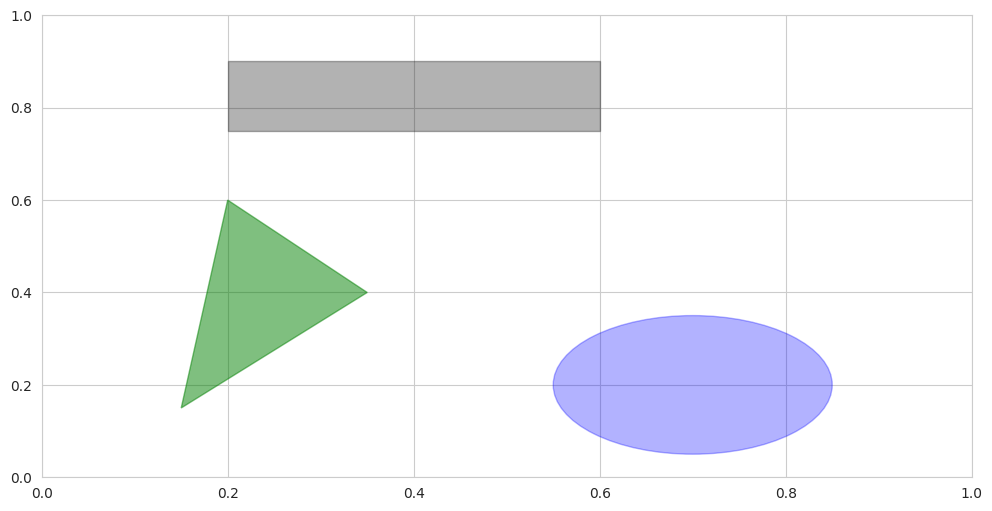

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

`figure` 객체의 `savefig` 메서드를 사용하여 그림을 파일에 저장할 수 있다. 예를 들어 그림의 SVG 버전을 저장하려면 다음과 같이 한다:

`fig.savefig("figpath.svg", dpi=400)`

파일 유형은 파일 확장자에서 유추된다. 따라서 `.pdf`를 대신 사용하면 PDF 파일이 생성된다.

##  Plotting with pandas and seaborn


pandas는 데이터 프레임 및 시리즈 객체를 시각화할 수 있는 메서드가 내장되어 있다. 또 다른 라이브러리로는 matplotlib에 기반한 고급 통계 그래픽 라이브러리인 seaborn이 있다. seaborn은 많은 일반적인 시각화 유형을 간단하게 만들 수 있다.

### Line Plots

<Axes: >

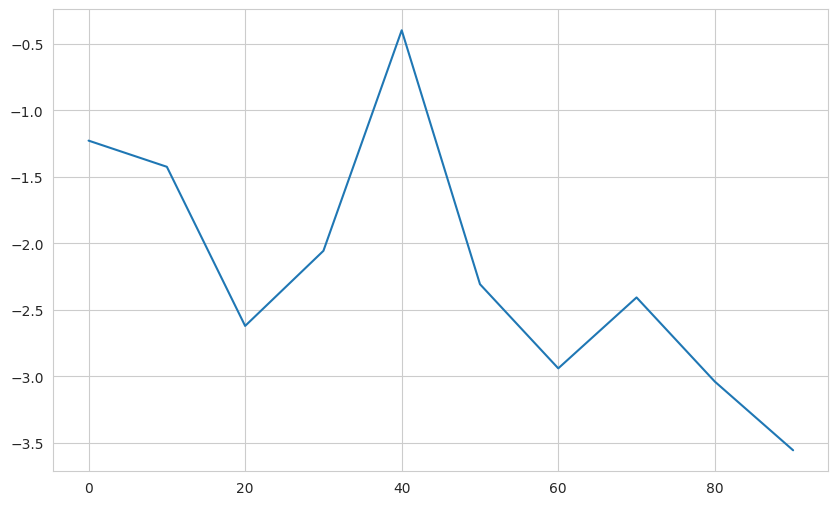

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

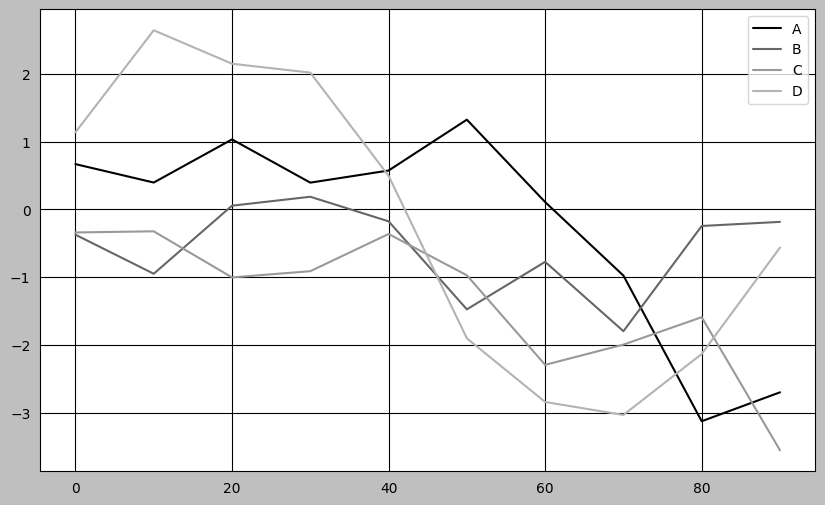

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

### Bar Plots

<Axes: >

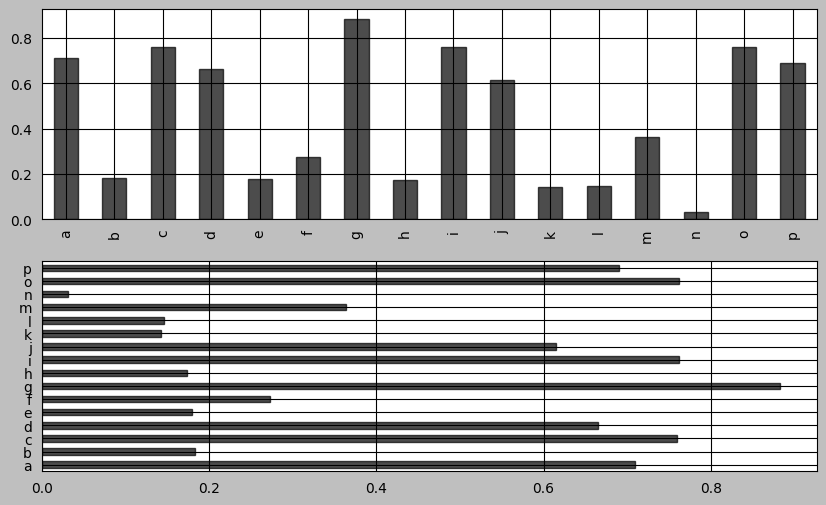

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

Genus         A         B         C         D
one    0.468737  0.579345  0.240025  0.892444
two    0.782042  0.380443  0.516791  0.072207
three  0.599080  0.354554  0.037316  0.313048
four   0.437510  0.198140  0.076123  0.928793
five   0.672701  0.522049  0.420056  0.273590
six    0.704719  0.379444  0.737204  0.319524


<Axes: >

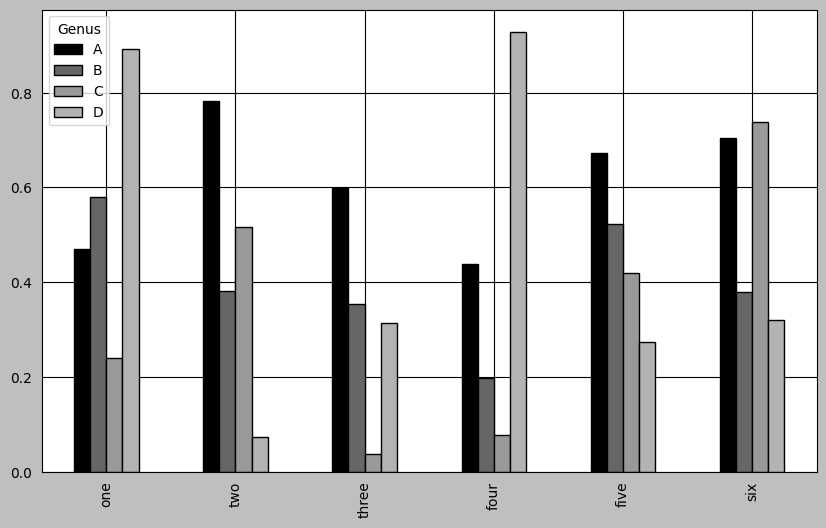

In [ ]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
print(df)
df.plot.bar()

<Axes: >

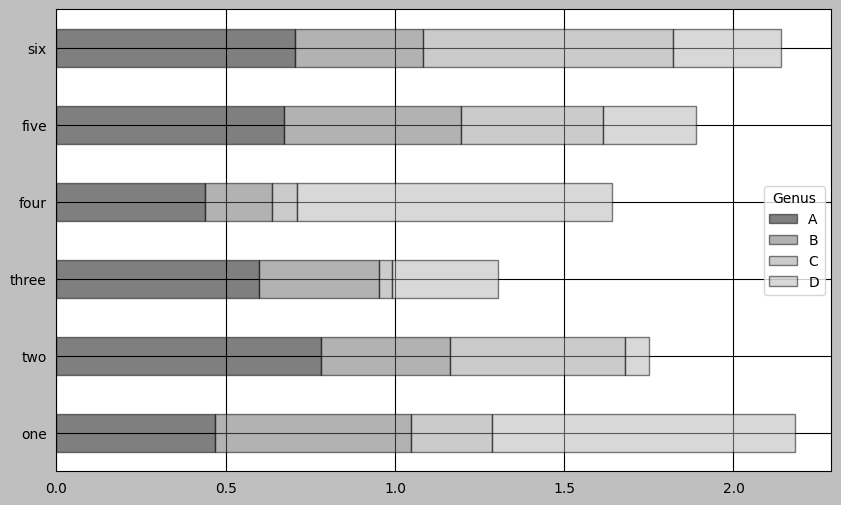

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
tips = pd.read_csv("/content/drive/MyDrive/DataScience2023/chap05_visualization/datasets/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
# pd.crosstab 메서드는 두 변수의 값의 조합의 등장 빈도를 계산한다. pivot_table 메서드로도 동일한 일을 할 수 있다.
party_counts = pd.crosstab(tips["day"], tips["size"])
# party_counts = pd.pivot_table(tips, index="day", columns="size", aggfunc='size', fill_value=0)
# party_counts = tips.pivot_table(index="day", columns="size", aggfunc='size', fill_value=0)
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [ ]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

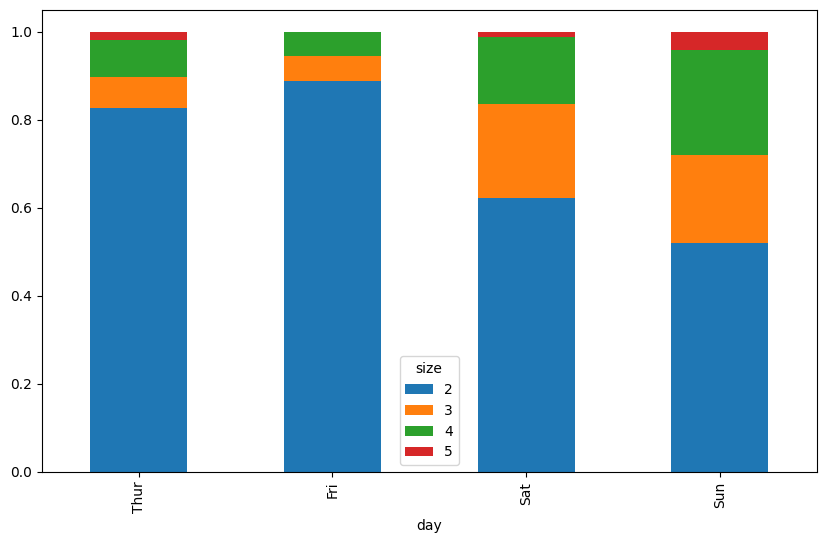

In [ ]:
party_pcts.plot.bar(stacked=True)

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

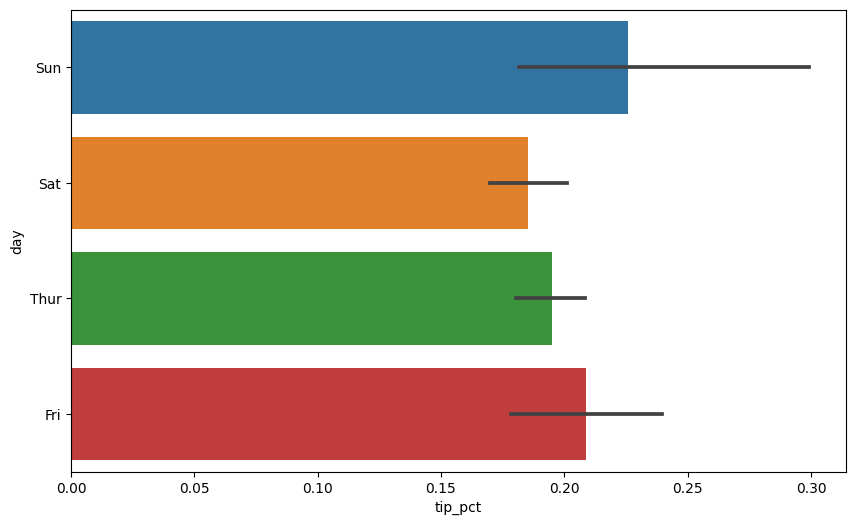

In [ ]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
print(tips.head())
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

하루 동안 각 값에 대해 여러 개의 관측값이 있으므로 이 그래프에서 막대는 `tip_pct`의 평균값이고, 막대에 그려진 검은색 선은 95% 신뢰 구간을 나타낸다.

`seaborn.barplot`에는 추가 범주 값으로 분할할 수 있는 `hue` 옵션이 있다.

<Axes: xlabel='tip_pct', ylabel='day'>

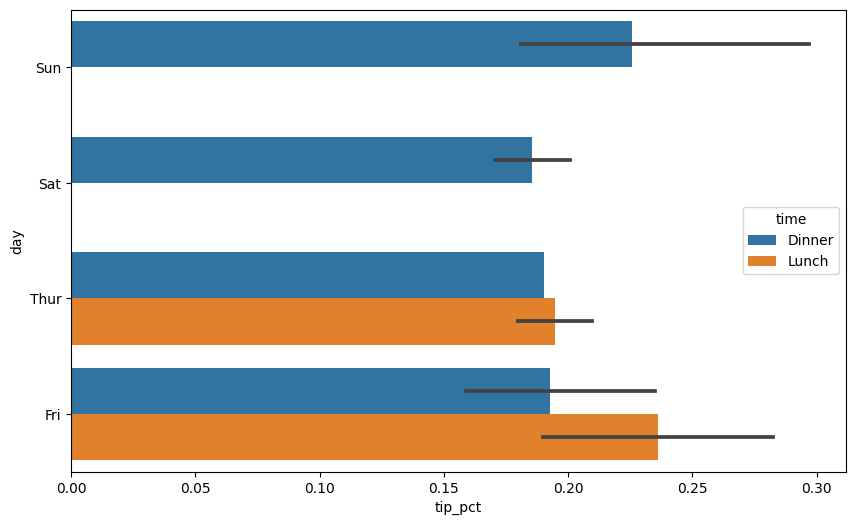

In [ ]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

`seaborn.set_style`을 사용하여 기본 색상 팔레트, 배경, 선 색상 등 플롯의 스타일을 전환할 수 있다:

In [ ]:
sns.set_style("whitegrid")

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

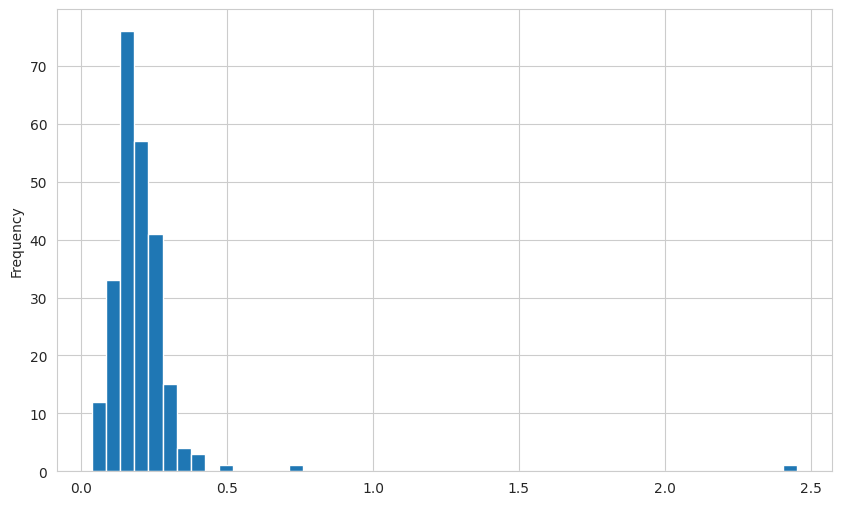

In [ ]:
plt.figure()
tips["tip_pct"].plot.hist(bins=50)

밀도 플롯(density plot)은 관찰된 데이터로부터 **연속 확률 분포의 추정치**를 계산하여 보여준다. 일반적인 절차는 이 분포를 '커널(kernel)', 즉 정규 분포와 같은 더 간단한 분포의 혼합으로 근사화(approximate)하는 것이다. 따라서 밀도 플롯은 커널 밀도 추정(Kernel Density Estimate: KDE) 플롯이라고도 부른다. `plot.density`를 사용하면 정규 혼합 추정치(mixture-of-normals estimate)를 사용하여 밀도 플롯을 만들 수 있다.

이러한 종류의 플롯에는 `SciPy`가 필요하므로 설치되어 있지 않은 경우 다음과 같이 설치할 수 있다:

    `conda install scipy`

<Axes: ylabel='Density'>

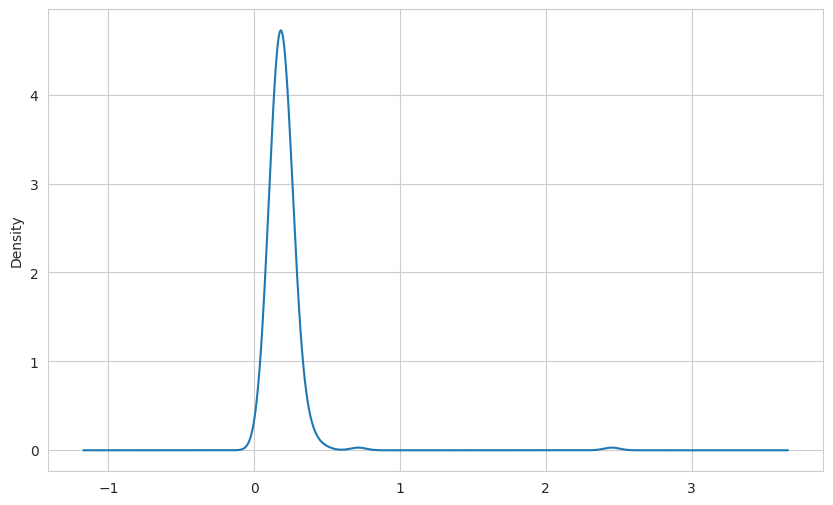

In [ ]:
plt.figure()
tips["tip_pct"].plot.density()

`seaborn`은 히스토그램과 연속 밀도 추정치를 동시에 그릴 수 있는 `histplot` 메서드를 통해 히스토그램과 밀도 플롯을 더욱 쉽게 만들 수 있다. 예를 들어, 두 개의 서로 다른 표준 정규 분포에서 추출한 값으로 구성된 바이모달(bimodal) 분포를 생각해 보자.

<Axes: ylabel='Count'>

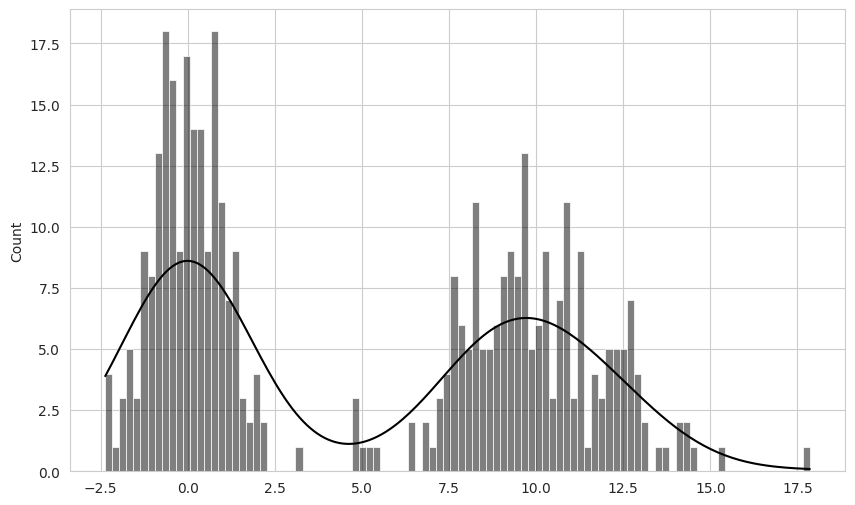

In [ ]:
plt.figure()
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black", kde = True)

<Axes: xlabel='tip_pct', ylabel='Count'>

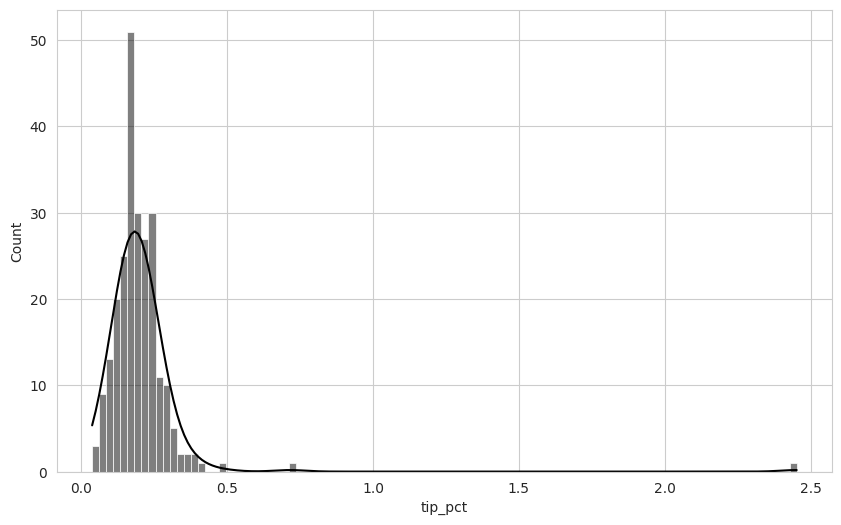

In [ ]:
sns.histplot(tips["tip_pct"], bins=100, color="black", kde = True)

### Scatter or Point Plots


포인트(points) 플롯 또는 분산형(scatter) 차트는 두 개의 1차원 데이터 시리즈 간의 관계를 조사하는 데 유용한 방법이 될 수 있다.

In [ ]:
macro = pd.read_csv("/content/drive/MyDrive/DataScience2023/chap05_visualization/datasets/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


`seaborn`의 `regplot` 메서드를 사용하여 분산형 차트를 만들고 선형 회귀선(linear regression line)을 계산하여 표시할 수 있다.

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

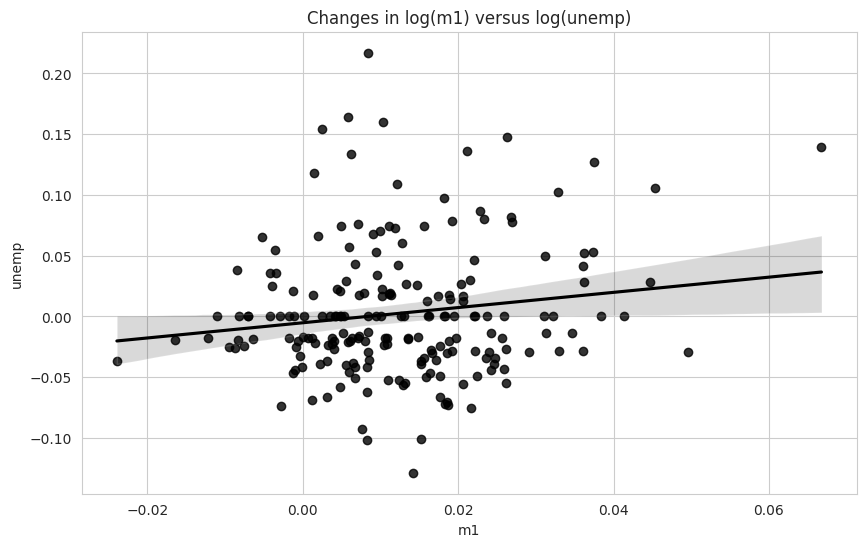

In [ ]:
plt.figure()
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

탐색적 데이터 분석(exploratory data analysis)에서는 변수 그룹 사이의 모든 분산형 차트를 볼 수 있으면 유용하며, 이를 페어 플롯(pair plot) 또는 분산형 차트 매트릭스(scatter plot matrix)라고 부른다. `seaborn`에는 각 변수의 히스토그램 또는 밀도 추정치를 대각선을 따라 배치할 수 있는 편리한 `pairplot` 기능이 있다.

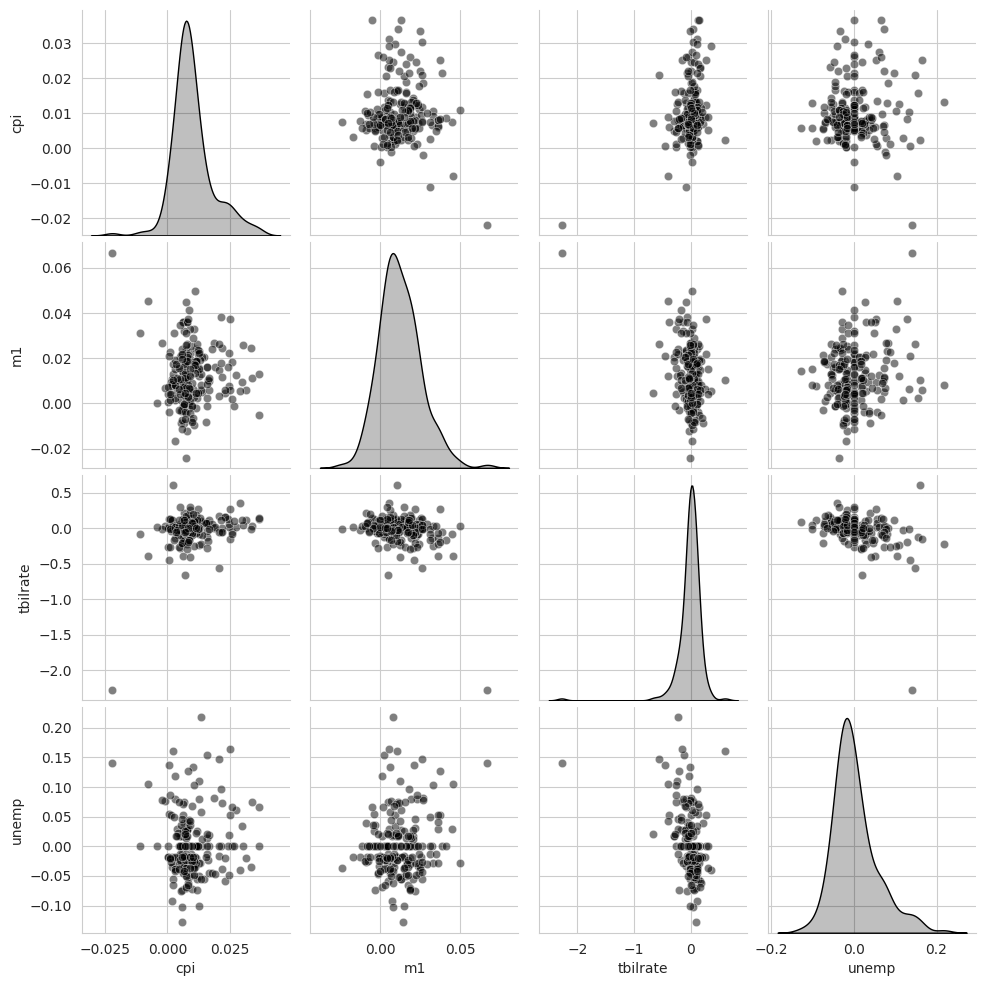

In [ ]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.5})

### Facet Grids and Categorical Data

범주형(categorial) 변수가 많은 데이터를 시각화하는 한 가지 방법은 특정 변수의 고유 값을 기준으로 데이터가 각 축의 플롯에 분할되는 2차원 플롯 레이아웃인 패싯 그리드(facet grid)를 사용하는 것이다. `seaborn`에는 범주형 변수로 분할되는 여러 종류의 패싯 플롯을 간단하게 만들 수 있는 유용한 내장 함수인 `catplot`이 있다.

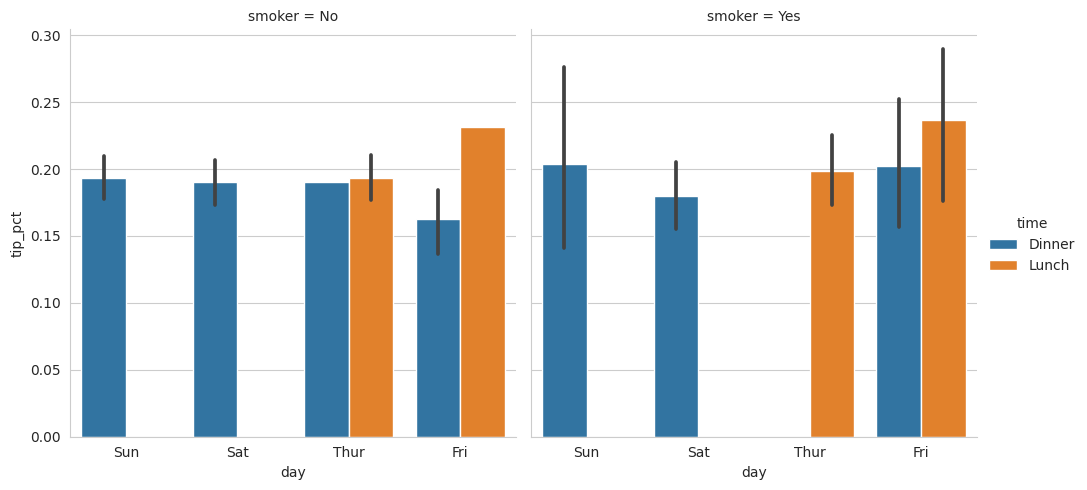

In [ ]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips['tip_pct'] < 1])

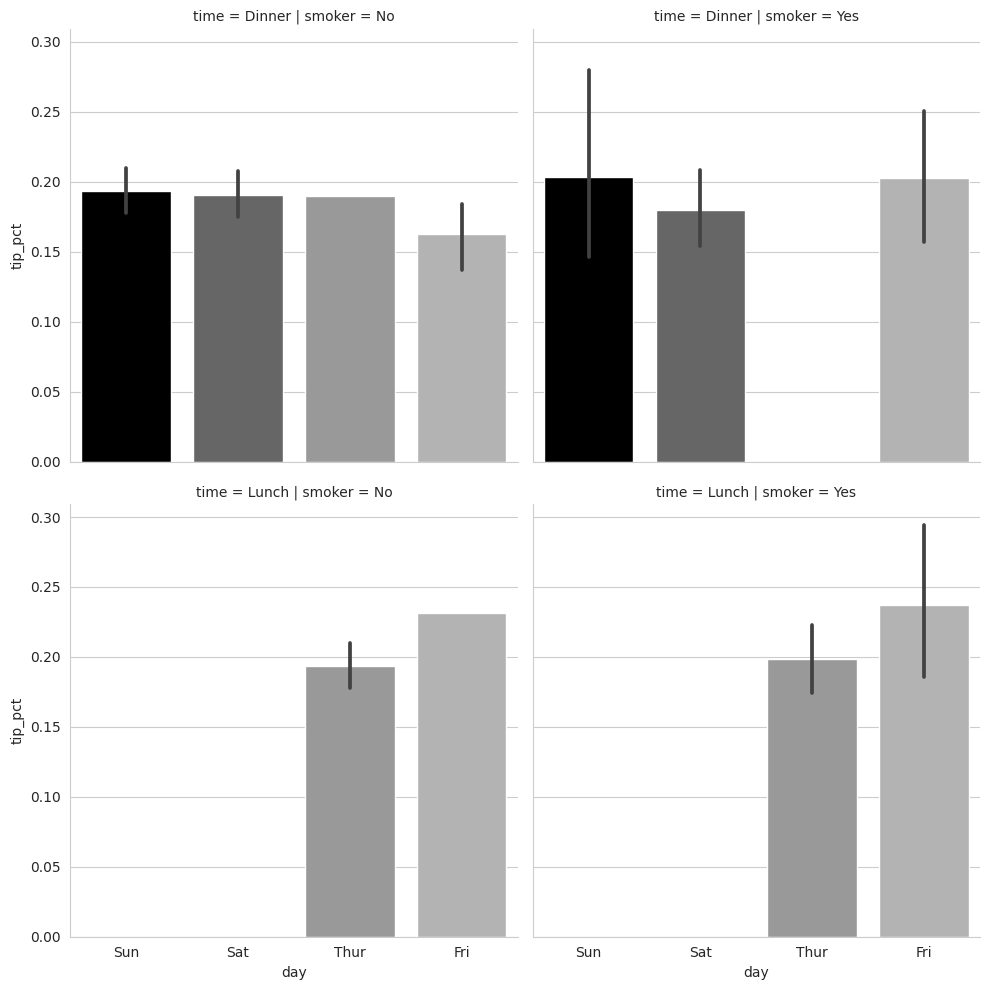

In [ ]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

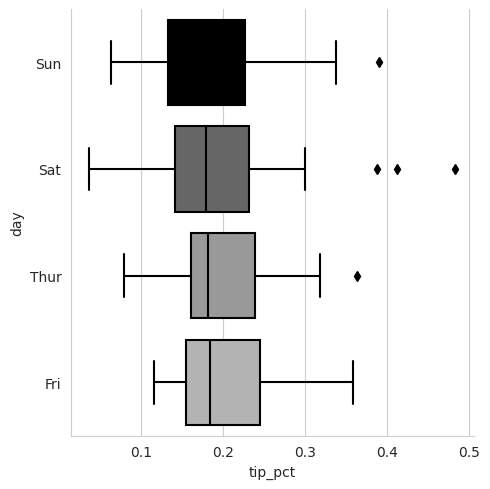

In [ ]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips['tip_pct'] < 0.5])